# Import libraries and Dataset

In [1]:
# Importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')

# Loading the data and Performing EDA

In [2]:
# Importing dataset
dataset = pd.read_csv('diabetes.csv')

# Dataset dimensions - (rows, columns)
print(dataset.shape,"\n")

# Preview data
print(dataset.head(),"\n")

# Statistical summary
print(dataset.describe().T,"\n")

# Count of null values
print("*****************  The null values in the dataset:  ****************")
print(dataset.isnull().sum(),"\n")

(1022, 9) 

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1   

                           count        mean         std     min     25%  \
Pregnancies               1022.0    3.833659    3.376435   0.000   1.000   
Glucose                   1022.0  120.113503   31.885183   0.000  99.000   
BloodPressure             1022.0   69.056751   19.413000   0.

# Data Visualization

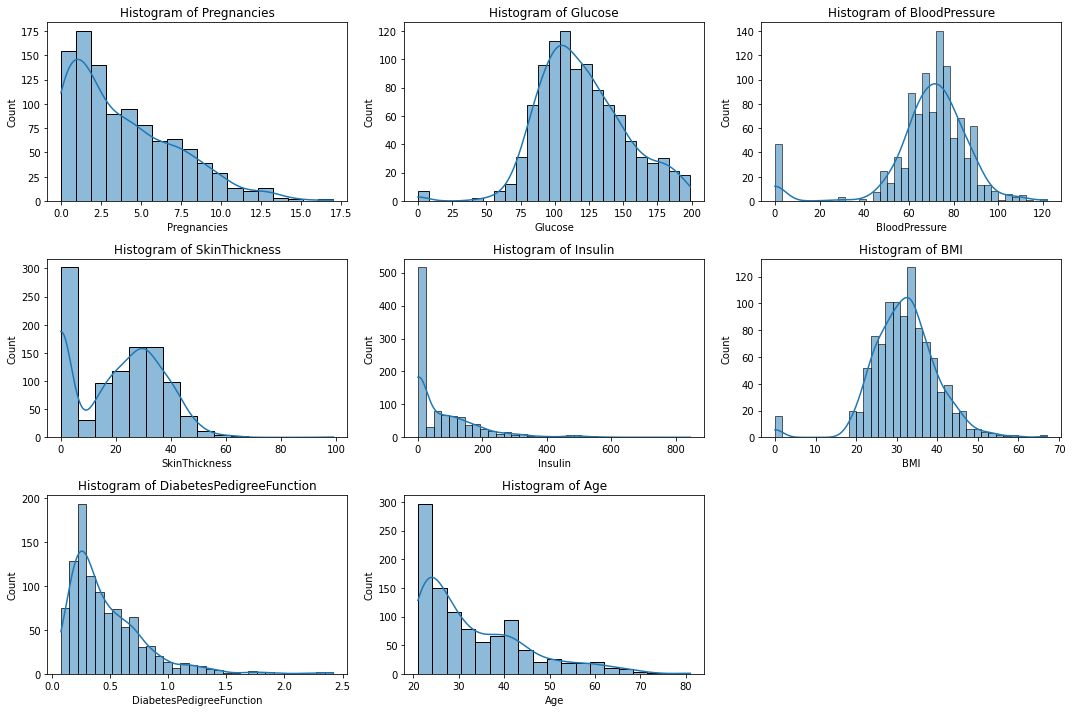

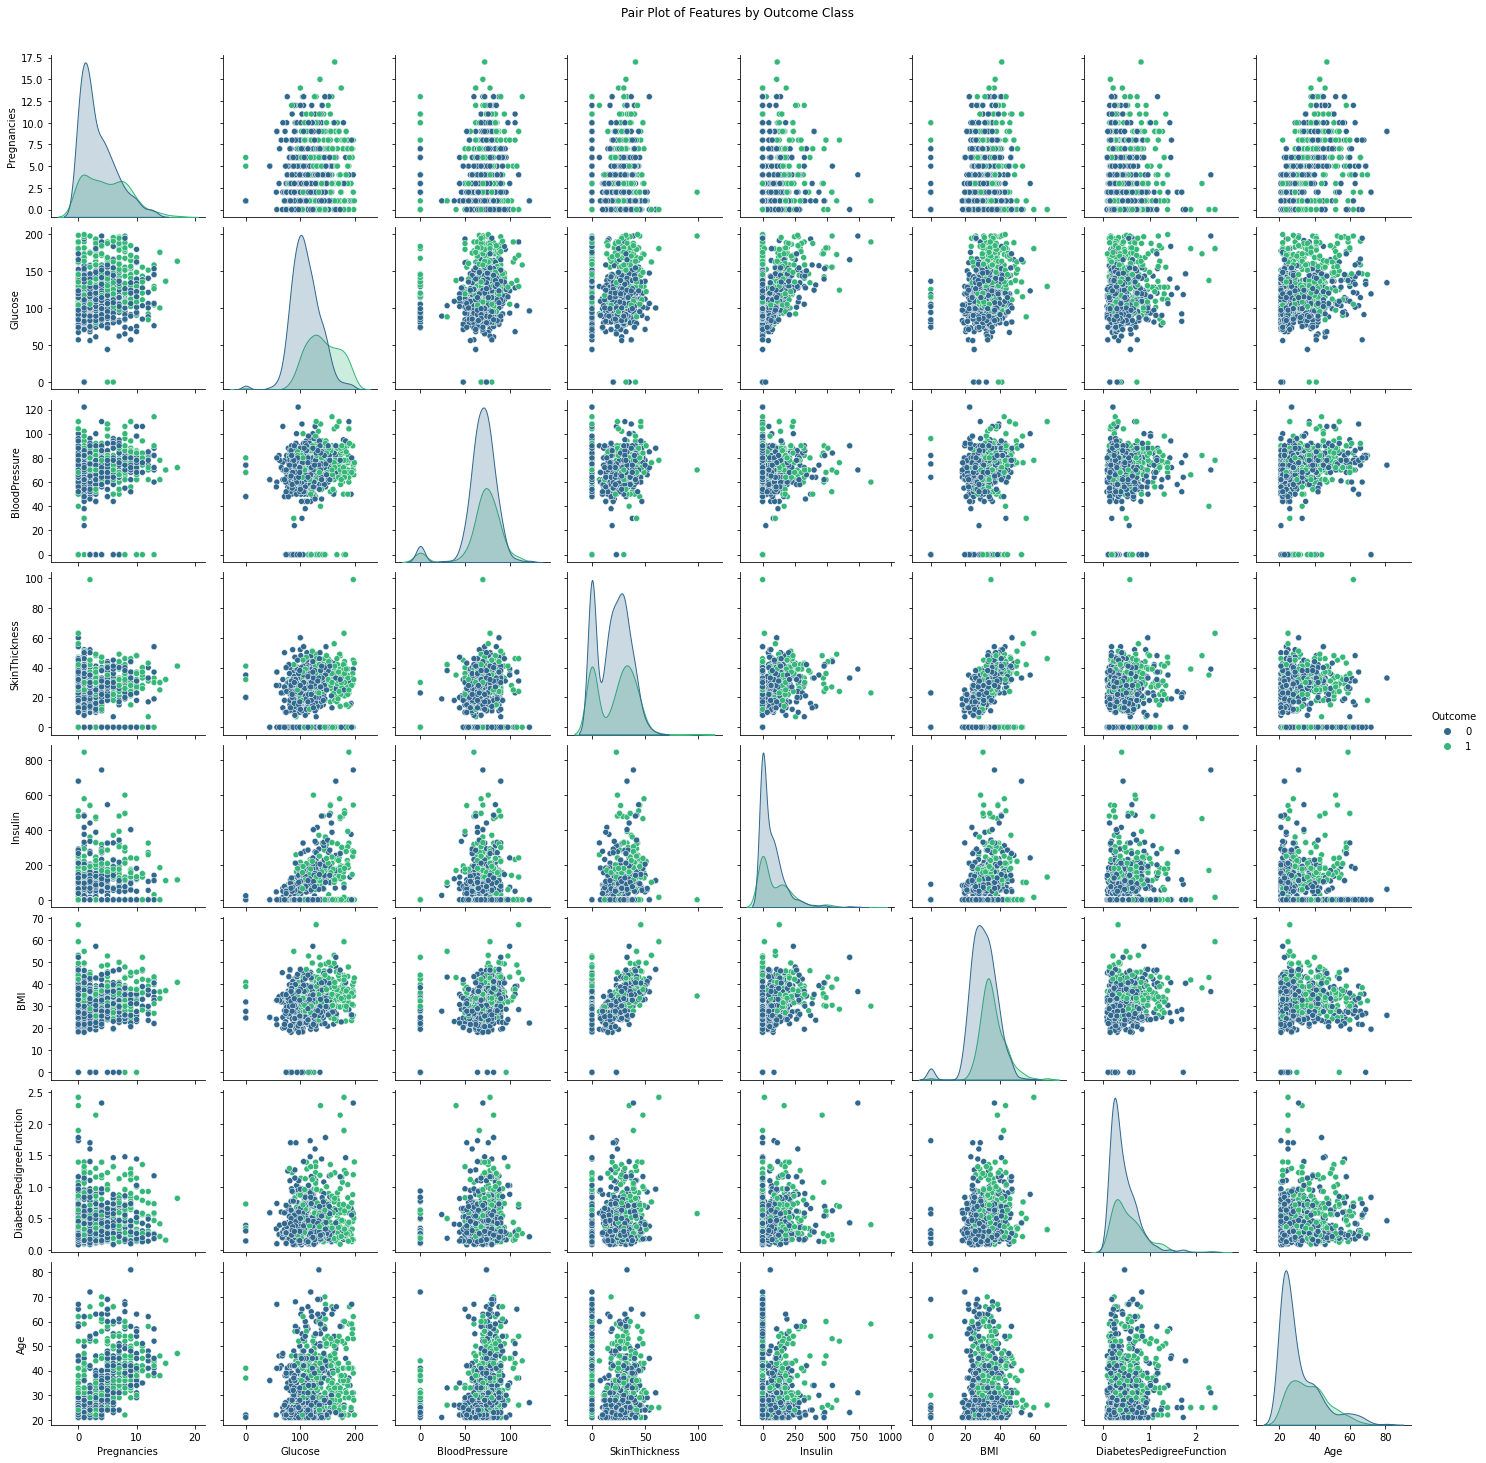

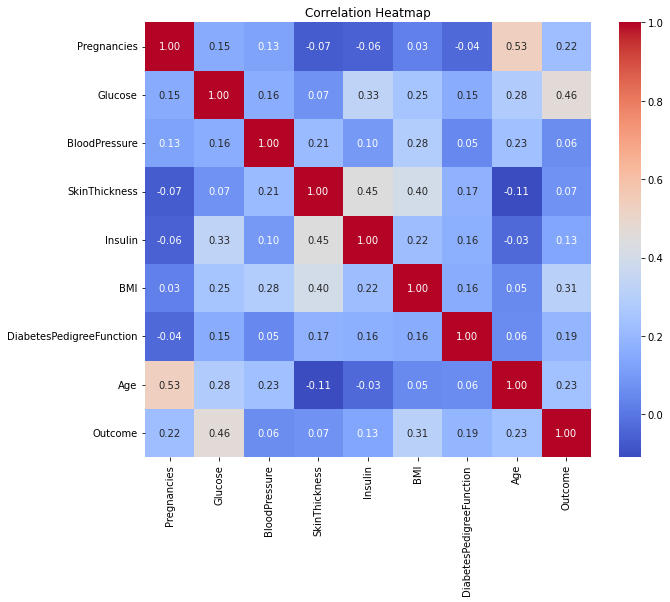

In [3]:
# Plot histograms for each feature
plt.figure(figsize=(15, 10))
for i, column in enumerate(dataset.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.histplot(dataset[column], kde=True)
    plt.title(f'Histogram of {column}')

plt.tight_layout()
plt.show()

# Plot pair plot for feature relationships colored by 'Outcome'
sns.pairplot(dataset, hue='Outcome', palette='viridis')
plt.suptitle('Pair Plot of Features by Outcome Class', y=1.02)
plt.show()

# Plot a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Data Preprocessing

## a. Replacing zero's as NaN , and again handling the null values with mean imputation technique

In [4]:
dataset_new = dataset

# Replacing zero values with NaN
dataset_new[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] = dataset_new[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0, np.NaN) 

# Count of NaN
print(dataset_new.isnull().sum(),"\n")

# Dropping NaN values
dataset_new.dropna(inplace=True)

# Statistical summary
print(dataset_new.describe().T,"\n")

# Count of NaN
print(dataset_new.isnull().sum(),"\n")

Pregnancies                   0
Glucose                       7
BloodPressure                47
SkinThickness               302
Insulin                     504
BMI                          16
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64 

                          count        mean         std     min      25%  \
Pregnancies               515.0    3.339806    3.247727   0.000   1.0000   
Glucose                   515.0  122.132039   30.815284  56.000  99.0000   
BloodPressure             515.0   70.724272   12.369855  24.000  64.0000   
SkinThickness             515.0   29.273786   10.675839   7.000  21.0000   
Insulin                   515.0  153.466019  117.349408  14.000  75.0000   
BMI                       515.0   33.212039    7.313405  18.200  28.4000   
DiabetesPedigreeFunction  515.0    0.520035    0.340106   0.085   0.2795   
Age                       515.0   30.844660   10.248619  21.000  23.0000   
Outcome      

## b. Performing Feature Scaling (standardization: aranging values between 0 and 1)

In [5]:
# Feature scaling using MinMaxScaler
'''from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
dataset_scaled = sc.fit_transform(dataset_new)

dataset_scaled = pd.DataFrame(dataset_scaled)
print(dataset_scaled)'''

'from sklearn.preprocessing import MinMaxScaler\nsc = MinMaxScaler(feature_range = (0, 1))\ndataset_scaled = sc.fit_transform(dataset_new)\n\ndataset_scaled = pd.DataFrame(dataset_scaled)\nprint(dataset_scaled)'

# Dividing into dependent and independent Columns, later splitting into training and testing data

In [6]:
# Selecting features - [Glucose, Insulin, BMI, Age]
#X = dataset_scaled.iloc[:, [1, 4, 5, 7]].values
#Y = dataset_scaled.iloc[:, 8].values
X = dataset_new.iloc[:, [1, 4, 5, 7]].values
Y = dataset_new.iloc[:, 8].values

# Handle class imbalance using RandomOverSampler
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, Y)

# Splitting X and Y
from sklearn.model_selection import train_test_split
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42, stratify = dataset_new['Outcome'] )
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify = y_resampled)

# Checking dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (555, 4)
X_test shape: (139, 4)
Y_train shape: (555,)
Y_test shape: (139,)


# Data Modelling

In [7]:
# Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train, Y_train)
print(logreg, "\n")

# K nearest neighbors Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 24)
knn.fit(X_train, Y_train)
print(knn, "\n")

# Support Vector Classifier Algorithm
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 42)
svc.fit(X_train, Y_train)
print(svc, "\n")

# Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, Y_train)
print(nb, "\n")

# Decision tree Algorithm
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dectree.fit(X_train, Y_train)
print(dectree, "\n")

# Random forest Algorithm
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier(n_estimators = 11, criterion = 'entropy', random_state = 42)
ranfor.fit(X_train, Y_train)
print(ranfor, "\n")

# Making predictions on test dataset
Y_pred_logreg = logreg.predict(X_test)
Y_pred_knn = knn.predict(X_test)
Y_pred_svc = svc.predict(X_test)
Y_pred_nb = nb.predict(X_test)
Y_pred_dectree = dectree.predict(X_test)
Y_pred_ranfor = ranfor.predict(X_test)

LogisticRegression(random_state=42) 

KNeighborsClassifier(n_neighbors=24) 

SVC(kernel='linear', random_state=42) 

GaussianNB() 

DecisionTreeClassifier(criterion='entropy', random_state=42) 

RandomForestClassifier(criterion='entropy', n_estimators=11, random_state=42) 



# Model Evaluation

In [8]:
# Evaluating using accuracy_score metric
from sklearn.metrics import accuracy_score
accuracy_logreg = accuracy_score(Y_test, Y_pred_logreg)
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
accuracy_svc = accuracy_score(Y_test, Y_pred_svc)
accuracy_nb = accuracy_score(Y_test, Y_pred_nb)
accuracy_dectree = accuracy_score(Y_test, Y_pred_dectree)
accuracy_ranfor = accuracy_score(Y_test, Y_pred_ranfor)


# Accuracy on test set
print("Logistic Regression: " + str(accuracy_logreg * 100))
print("K Nearest neighbors: " + str(accuracy_knn * 100))
print("Support Vector Classifier: " + str(accuracy_svc * 100))
print("Naive Bayes: " + str(accuracy_nb * 100))
print("Decision tree: " + str(accuracy_dectree * 100))
print("Random Forest: " + str(accuracy_ranfor * 100))

Logistic Regression: 77.6978417266187
K Nearest neighbors: 74.10071942446042
Support Vector Classifier: 77.6978417266187
Naive Bayes: 74.82014388489209
Decision tree: 94.96402877697841
Random Forest: 92.08633093525181


confusion matrix: 
 [[63  7]
 [ 0 69]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        70
           1       0.91      1.00      0.95        69

    accuracy                           0.95       139
   macro avg       0.95      0.95      0.95       139
weighted avg       0.95      0.95      0.95       139



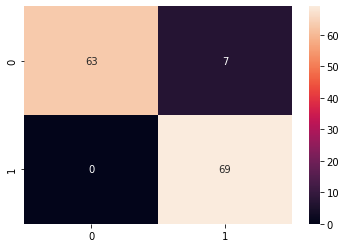

In [9]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_dectree)
print("confusion matrix: \n", cm)

# Heatmap of Confusion matrix
sns.heatmap(pd.DataFrame(cm), annot=True)

# Classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_dectree))


In [10]:
#creating or dumping model into pickle file
import pickle
pickle.dump(dectree, open('Decision_Tree.pkl', 'wb'))

#creating or dumping model into pickle file
import pickle
pickle.dump(ranfor, open('random_forest.pkl', 'wb'))
